Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os,shutil
import pandas as pd
import keras
from keras.layers import *
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.models import load_model
from PIL import Image
!pip install transformers
from transformers import ViTFeatureExtractor, ViTModel
from PIL import ImageFile
from tqdm import tqdm
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve,classification_report
from imblearn.over_sampling import SMOTE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 89.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 21.8 MB/s eta 0:00:00


In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

**Train Data**

In [ ]:
%cd /content/drive/MyDrive/second_third-400/Train/second/
path= '/content/drive/MyDrive/second_third-400/Train/second'
files=os.listdir(path)
image_name=[]
lhs=[]
category=[]
for filename in tqdm(files):
  image_name.append(filename)
  category.append('second')
  image = Image.open(filename)
  image=image.convert('RGB')
  feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
  model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")
  inputs = feature_extractor(image, return_tensors="pt")
  with torch.no_grad():
    outputs = model(**inputs)
  last_hidden_states = torch.squeeze(outputs.pooler_output)#torch.squeeze(torch.unsqueeze(torch.tensor(np.average(torch.squeeze(outputs.last_hidden_state),axis=0)),1))
  lhs.append(last_hidden_states)

/content/drive/MyDrive/second_third-400/Train/second


  0%|          | 0/280 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
100%|██████████| 280/280 [11:06<00:00,  2.38s/it]


In [ ]:
%cd

/root


In [ ]:
%cd /content/drive/MyDrive/second_third-400/Train/third/
path= '/content/drive/MyDrive/second_third-400/Train/third'
files=os.listdir(path)
# image_name=[]
# lhs=[]
# category=[]
for filename in tqdm(files):
  image_name.append(filename)
  category.append('third')
  image = Image.open(filename)
  image=image.convert('RGB')
  feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
  model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")
  inputs = feature_extractor(image, return_tensors="pt")
  with torch.no_grad():
    outputs = model(**inputs)
  last_hidden_states = torch.squeeze(outputs.pooler_output)#torch.squeeze(torch.unsqueeze(torch.tensor(np.average(torch.squeeze(outputs.last_hidden_state),axis=0)),1))
  lhs.append(last_hidden_states)

/content/drive/MyDrive/second_third-400/Train/third


100%|██████████| 280/280 [11:09<00:00,  2.39s/it]


In [ ]:
train=pd.DataFrame(list(zip(image_name,lhs,category)),columns=["Image_Name","Vectors","Category"])
train.head()

,Image_Name,Vectors,Category
0,0002026_20210413_OBST-_-_1st-_TRIM_0001_1.JPG,"[tensor(0.3215), tensor(-0.3273), tensor(-0.62...",second
1,0002043_20210309_OBST-_2ND-_TRIM_0002_1.JPG,"[tensor(0.9034), tensor(-0.1992), tensor(-0.44...",second
2,0002034_20210331_OBST-_2ND-_TRIM_0001_1.JPG,"[tensor(0.6722), tensor(-0.1702), tensor(-0.57...",second
3,0106455_20210401_OBST-_2ND-_TRIM_0002_1.JPG,"[tensor(0.7319), tensor(0.1490), tensor(-0.076...",second
4,0003032_20210510_OBST-_2ND-_TRIM_0002_1.JPG,"[tensor(0.7727), tensor(-0.1443), tensor(-0.52...",second


In [ ]:
vector=[]
for i in range(1,769):
    vector.append("Vector_"+str(i))

In [ ]:
split_result = pd.DataFrame(train["Vectors"].tolist(), columns=vector)
split_result=split_result.astype(float)
split_result.head()

,Vector_1,Vector_2,Vector_3,Vector_4,Vector_5,Vector_6,Vector_7,Vector_8,Vector_9,Vector_10,...,Vector_759,Vector_760,Vector_761,Vector_762,Vector_763,Vector_764,Vector_765,Vector_766,Vector_767,Vector_768
0,0.321543,-0.327334,-0.621547,-0.146469,0.026747,0.297072,-0.197090,0.607569,-0.091629,-0.074574,...,-0.742569,0.329253,0.452098,0.035366,0.091563,0.657705,-0.250613,0.361952,0.411957,-0.449072
1,0.903375,-0.199154,-0.442676,0.304170,-0.117612,-0.272265,0.528066,0.503082,0.199319,-0.221460,...,-0.604576,-0.170453,-0.193658,0.053171,-0.346490,0.617210,-0.494619,0.594790,0.680522,-0.269754
2,0.672157,-0.170179,-0.570109,-0.102693,-0.178686,-0.362534,0.261405,0.048315,0.464478,-0.237978,...,-0.681662,0.393738,-0.076794,0.245733,-0.173030,0.422275,0.024384,0.637318,0.689749,-0.524439
3,0.731940,0.149011,-0.076775,0.152313,-0.714634,-0.084753,0.692468,0.674096,-0.130275,0.108257,...,-0.621281,-0.011926,-0.333240,-0.347468,0.051366,0.727555,-0.640952,0.060057,0.705487,-0.362551
4,0.772704,-0.144297,-0.520626,0.226177,-0.319563,0.321814,0.801754,0.460488,0.101361,0.286050,...,-0.608837,0.088091,-0.193649,0.077795,0.026482,0.786876,-0.448256,0.047532,0.484163,-0.341414


In [ ]:
for i in range(1,769):
    train["Vector_"+str(i)]=split_result["Vector_"+str(i)]
train.head()

<ipython-input-49-a2389bd6eed5>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  train["Vector_"+str(i)]=split_result["Vector_"+str(i)]


,Image_Name,Vectors,Category,Vector_1,Vector_2,Vector_3,Vector_4,Vector_5,Vector_6,Vector_7,...,Vector_759,Vector_760,Vector_761,Vector_762,Vector_763,Vector_764,Vector_765,Vector_766,Vector_767,Vector_768
0,0002026_20210413_OBST-_-_1st-_TRIM_0001_1.JPG,"[tensor(0.3215), tensor(-0.3273), tensor(-0.62...",second,0.321543,-0.327334,-0.621547,-0.146469,0.026747,0.297072,-0.197090,...,-0.742569,0.329253,0.452098,0.035366,0.091563,0.657705,-0.250613,0.361952,0.411957,-0.449072
1,0002043_20210309_OBST-_2ND-_TRIM_0002_1.JPG,"[tensor(0.9034), tensor(-0.1992), tensor(-0.44...",second,0.903375,-0.199154,-0.442676,0.304170,-0.117612,-0.272265,0.528066,...,-0.604576,-0.170453,-0.193658,0.053171,-0.346490,0.617210,-0.494619,0.594790,0.680522,-0.269754
2,0002034_20210331_OBST-_2ND-_TRIM_0001_1.JPG,"[tensor(0.6722), tensor(-0.1702), tensor(-0.57...",second,0.672157,-0.170179,-0.570109,-0.102693,-0.178686,-0.362534,0.261405,...,-0.681662,0.393738,-0.076794,0.245733,-0.173030,0.422275,0.024384,0.637318,0.689749,-0.524439
3,0106455_20210401_OBST-_2ND-_TRIM_0002_1.JPG,"[tensor(0.7319), tensor(0.1490), tensor(-0.076...",second,0.731940,0.149011,-0.076775,0.152313,-0.714634,-0.084753,0.692468,...,-0.621281,-0.011926,-0.333240,-0.347468,0.051366,0.727555,-0.640952,0.060057,0.705487,-0.362551
4,0003032_20210510_OBST-_2ND-_TRIM_0002_1.JPG,"[tensor(0.7727), tensor(-0.1443), tensor(-0.52...",second,0.772704,-0.144297,-0.520626,0.226177,-0.319563,0.321814,0.801754,...,-0.608837,0.088091,-0.193649,0.077795,0.026482,0.786876,-0.448256,0.047532,0.484163,-0.341414


In [ ]:
columns=[]
columns.extend(vector)
X_train=train[columns]

In [ ]:
Y_train=[]
for i in tqdm(train['Category']):
  if i=='second':
    Y_train.append(0)
  else:
    Y_train.append(1)

100%|██████████| 560/560 [00:00<00:00, 317793.29it/s]


**Valid Data**

In [ ]:
%cd

/root


In [ ]:
%cd /content/drive/MyDrive/second_third-400/Valid/second/
path= '/content/drive/MyDrive/second_third-400/Valid/second'
files=os.listdir(path)
image_name=[]
lhs=[]
category=[]
for filename in tqdm(files):
  image_name.append(filename)
  category.append('second')
  image = Image.open(filename)
  image=image.convert('RGB')
  feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
  model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")
  inputs = feature_extractor(image, return_tensors="pt")
  with torch.no_grad():
    outputs = model(**inputs)
  last_hidden_states = torch.squeeze(outputs.pooler_output)#torch.squeeze(torch.unsqueeze(torch.tensor(np.average(torch.squeeze(outputs.last_hidden_state),axis=0)),1))
  lhs.append(last_hidden_states)

/content/drive/MyDrive/second_third-400/Valid/second


  0%|          | 0/60 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
100%|██████████| 60/60 [02:16<00:00,  2.27s/it]


In [ ]:
%cd

/root


In [ ]:
%cd /content/drive/MyDrive/second_third-400/Valid/third/
path= '/content/drive/MyDrive/second_third-400/Valid/third'
files=os.listdir(path)
# image_name=[]
# lhs=[]
# category=[]
for filename in tqdm(files):
  image_name.append(filename)
  category.append('third')
  image = Image.open(filename)
  image=image.convert('RGB')
  feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
  model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")
  inputs = feature_extractor(image, return_tensors="pt")
  with torch.no_grad():
    outputs = model(**inputs)
  last_hidden_states = torch.squeeze(outputs.pooler_output)#torch.squeeze(torch.unsqueeze(torch.tensor(np.average(torch.squeeze(outputs.last_hidden_state),axis=0)),1))
  lhs.append(last_hidden_states)

/content/drive/MyDrive/second_third-400/Valid/third


100%|██████████| 60/60 [02:19<00:00,  2.33s/it]


In [ ]:
valid=pd.DataFrame(list(zip(image_name,lhs,category)),columns=["Image_Name","Vectors","Category"])
valid.head()

,Image_Name,Vectors,Category
0,0144960_20210518_OBST-_2ND-_TRIM_0001_1.JPG,"[tensor(0.3449), tensor(-0.2891), tensor(-0.55...",second
1,0145295_20210306_OBST-_2ND-_TRIM_0001_1.JPG,"[tensor(0.4891), tensor(-0.1184), tensor(-0.49...",second
2,0145356_20210324_OBST-_2ND-_TRIM_0001_1.JPG,"[tensor(0.8565), tensor(-0.1365), tensor(-0.47...",second
3,0145295_20210306_OBST-_2ND-_TRIM_0003_1.JPG,"[tensor(0.5956), tensor(-0.1220), tensor(-0.66...",second
4,0143753_20210316_OBST-_2ND-_TRIM_0002_1.JPG,"[tensor(0.0876), tensor(-0.0378), tensor(0.013...",second


In [ ]:
vector=[]
for i in range(1,769):
    vector.append("Vector_"+str(i))

In [ ]:
split_result = pd.DataFrame(valid["Vectors"].tolist(), columns=vector)
split_result=split_result.astype(float)
split_result.head()

,Vector_1,Vector_2,Vector_3,Vector_4,Vector_5,Vector_6,Vector_7,Vector_8,Vector_9,Vector_10,...,Vector_759,Vector_760,Vector_761,Vector_762,Vector_763,Vector_764,Vector_765,Vector_766,Vector_767,Vector_768
0,0.344896,-0.289124,-0.559773,0.375917,0.057639,0.396489,0.481017,0.896795,0.032627,-0.442638,...,-0.178881,0.128789,0.083945,-0.229970,-0.196906,0.809028,-0.438778,0.021005,0.119431,-0.084183
1,0.489053,-0.118376,-0.499312,0.193240,0.267175,-0.055814,0.701195,0.784948,-0.021784,-0.335473,...,-0.499611,-0.071770,-0.280714,-0.178864,-0.262444,0.648384,-0.522273,0.256695,0.201508,-0.077661
2,0.856465,-0.136523,-0.478320,-0.005833,0.282869,-0.009520,0.659884,0.211608,0.439570,-0.171283,...,-0.549360,0.447688,-0.086826,0.236907,0.119754,0.292204,-0.393927,0.299902,0.677814,-0.368425
3,0.595632,-0.122020,-0.665436,0.167766,-0.234272,0.035926,0.803438,0.644830,-0.293105,0.087626,...,-0.669882,-0.122431,-0.560752,-0.039832,-0.051762,0.577683,-0.422051,-0.005596,0.316703,-0.318425
4,0.087620,-0.037849,0.013393,0.308072,0.270427,0.485399,0.633035,0.504789,-0.445954,0.204629,...,-0.507883,0.053183,-0.209511,-0.505735,-0.318484,0.576499,-0.359886,-0.223434,0.525560,0.078647


In [ ]:
for i in range(1,769):
    valid["Vector_"+str(i)]=split_result["Vector_"+str(i)]
valid.head()

<ipython-input-59-ecd52c476d87>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  valid["Vector_"+str(i)]=split_result["Vector_"+str(i)]


,Image_Name,Vectors,Category,Vector_1,Vector_2,Vector_3,Vector_4,Vector_5,Vector_6,Vector_7,...,Vector_759,Vector_760,Vector_761,Vector_762,Vector_763,Vector_764,Vector_765,Vector_766,Vector_767,Vector_768
0,0144960_20210518_OBST-_2ND-_TRIM_0001_1.JPG,"[tensor(0.3449), tensor(-0.2891), tensor(-0.55...",second,0.344896,-0.289124,-0.559773,0.375917,0.057639,0.396489,0.481017,...,-0.178881,0.128789,0.083945,-0.229970,-0.196906,0.809028,-0.438778,0.021005,0.119431,-0.084183
1,0145295_20210306_OBST-_2ND-_TRIM_0001_1.JPG,"[tensor(0.4891), tensor(-0.1184), tensor(-0.49...",second,0.489053,-0.118376,-0.499312,0.193240,0.267175,-0.055814,0.701195,...,-0.499611,-0.071770,-0.280714,-0.178864,-0.262444,0.648384,-0.522273,0.256695,0.201508,-0.077661
2,0145356_20210324_OBST-_2ND-_TRIM_0001_1.JPG,"[tensor(0.8565), tensor(-0.1365), tensor(-0.47...",second,0.856465,-0.136523,-0.478320,-0.005833,0.282869,-0.009520,0.659884,...,-0.549360,0.447688,-0.086826,0.236907,0.119754,0.292204,-0.393927,0.299902,0.677814,-0.368425
3,0145295_20210306_OBST-_2ND-_TRIM_0003_1.JPG,"[tensor(0.5956), tensor(-0.1220), tensor(-0.66...",second,0.595632,-0.122020,-0.665436,0.167766,-0.234272,0.035926,0.803438,...,-0.669882,-0.122431,-0.560752,-0.039832,-0.051762,0.577683,-0.422051,-0.005596,0.316703,-0.318425
4,0143753_20210316_OBST-_2ND-_TRIM_0002_1.JPG,"[tensor(0.0876), tensor(-0.0378), tensor(0.013...",second,0.087620,-0.037849,0.013393,0.308072,0.270427,0.485399,0.633035,...,-0.507883,0.053183,-0.209511,-0.505735,-0.318484,0.576499,-0.359886,-0.223434,0.525560,0.078647


In [ ]:
columns=[]
columns.extend(vector)
X_valid=valid[columns]

In [ ]:
Y_valid=[]
for i in tqdm(valid['Category']):
  if i=='second':
    Y_valid.append(0)
  else:
    Y_valid.append(1)

100%|██████████| 120/120 [00:00<00:00, 133328.87it/s]


**Combine Train and Valid Data**

In [ ]:
frames = [X_train, X_valid]
result = pd.concat(frames)
X_train=result
Y_train.extend(Y_valid)

**Smote**

In [ ]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X_train, Y_train)

**Test Data**

In [ ]:
%cd

/root


In [ ]:
%cd /content/drive/MyDrive/second_third-400/Test/second
path= '/content/drive/MyDrive/second_third-400/Test/second'
files=os.listdir(path)
image_name=[]
lhs=[]
category=[]
for filename in tqdm(files):
  image_name.append(filename)
  category.append('second')
  image = Image.open(filename)
  image=image.convert('RGB')
  feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
  model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")
  inputs = feature_extractor(image, return_tensors="pt")
  with torch.no_grad():
    outputs = model(**inputs)
  last_hidden_states = torch.squeeze(outputs.pooler_output)#torch.squeeze(torch.unsqueeze(torch.tensor(np.average(torch.squeeze(outputs.last_hidden_state),axis=0)),1))
  lhs.append(last_hidden_states)

/content/drive/MyDrive/second_third-400/Test/second


  0%|          | 0/60 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
100%|██████████| 60/60 [02:33<00:00,  2.55s/it]


In [ ]:
%cd

/root


In [ ]:
%cd /content/drive/MyDrive/second_third-400/Test/third/
path= '/content/drive/MyDrive/second_third-400/Test/third/'
files=os.listdir(path)
# image_name=[]
# lhs=[]
# category=[]
for filename in tqdm(files):
  image_name.append(filename)
  category.append('third')
  image = Image.open(filename)
  image=image.convert('RGB')
  feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
  model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")
  inputs = feature_extractor(image, return_tensors="pt")
  with torch.no_grad():
    outputs = model(**inputs)
  last_hidden_states = torch.squeeze(outputs.pooler_output)#torch.squeeze(torch.unsqueeze(torch.tensor(np.average(torch.squeeze(outputs.last_hidden_state),axis=0)),1))
  lhs.append(last_hidden_states)

/content/drive/MyDrive/second_third-400/Test/third


100%|██████████| 60/60 [02:19<00:00,  2.32s/it]


In [ ]:
test=pd.DataFrame(list(zip(image_name,lhs,category)),columns=["Image_Name","Vectors","Category"])
test.head()

,Image_Name,Vectors,Category
0,0155573_20210304_OBST-_2ND-_TRIM_0003_1.JPG,"[tensor(0.2347), tensor(0.0140), tensor(0.1555...",second
1,0153676_20210324_OBST-_2ND-_TRIM_0001_1.JPG,"[tensor(0.6578), tensor(0.0318), tensor(-0.266...",second
2,0153586_20210129_OBST-_2ND-_TRIM_0002_1.JPG,"[tensor(0.7077), tensor(-0.2889), tensor(-0.86...",second
3,0165417_20210323_OBST-_2ND-_TRIM_0002_1.JPG,"[tensor(0.7364), tensor(-0.2306), tensor(-0.47...",second
4,0147627_20210527_OBST-_2ND-_TRIM_0003_1.JPG,"[tensor(0.6802), tensor(-0.4189), tensor(-0.54...",second


In [ ]:
vector=[]
for i in range(1,769):
    vector.append("Vector_"+str(i))

In [ ]:
split_result = pd.DataFrame(test["Vectors"].tolist(), columns=vector)
split_result=split_result.astype(float)
split_result.head()

,Vector_1,Vector_2,Vector_3,Vector_4,Vector_5,Vector_6,Vector_7,Vector_8,Vector_9,Vector_10,...,Vector_759,Vector_760,Vector_761,Vector_762,Vector_763,Vector_764,Vector_765,Vector_766,Vector_767,Vector_768
0,0.234697,0.014044,0.155532,0.384785,0.074621,0.687860,0.716433,0.670438,-0.610564,0.233299,...,-0.618591,0.331930,-0.392173,0.115536,-0.535151,0.302526,-0.027718,-0.129056,0.592432,-0.392543
1,0.657825,0.031790,-0.266524,0.464014,0.076833,0.395375,0.673712,0.734783,0.154358,0.080266,...,-0.692000,-0.022529,-0.364431,-0.135117,0.062994,0.600280,-0.668694,0.173921,0.168289,-0.347179
2,0.707675,-0.288941,-0.867374,0.046051,-0.277332,0.320138,0.258072,0.411861,-0.070816,-0.084327,...,-0.690720,0.358700,-0.602776,0.263323,0.064140,0.518555,-0.095096,0.532411,0.775421,0.026981
3,0.736433,-0.230571,-0.475184,-0.294676,-0.459719,-0.131909,0.216790,0.141884,0.149105,-0.329883,...,-0.838243,0.334716,-0.406547,0.463451,0.247450,0.489495,0.116020,0.435104,0.770486,-0.409212
4,0.680180,-0.418936,-0.547976,0.308355,-0.259263,0.036980,0.005465,0.478560,-0.198804,-0.385260,...,-0.647832,0.201986,-0.287984,0.424202,-0.019495,0.357270,0.134109,0.225556,0.758596,-0.387187


In [ ]:
for i in range(1,769):
    test["Vector_"+str(i)]=split_result["Vector_"+str(i)]
test.head()

<ipython-input-71-92b2643bf7f4>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  test["Vector_"+str(i)]=split_result["Vector_"+str(i)]


,Image_Name,Vectors,Category,Vector_1,Vector_2,Vector_3,Vector_4,Vector_5,Vector_6,Vector_7,...,Vector_759,Vector_760,Vector_761,Vector_762,Vector_763,Vector_764,Vector_765,Vector_766,Vector_767,Vector_768
0,0155573_20210304_OBST-_2ND-_TRIM_0003_1.JPG,"[tensor(0.2347), tensor(0.0140), tensor(0.1555...",second,0.234697,0.014044,0.155532,0.384785,0.074621,0.687860,0.716433,...,-0.618591,0.331930,-0.392173,0.115536,-0.535151,0.302526,-0.027718,-0.129056,0.592432,-0.392543
1,0153676_20210324_OBST-_2ND-_TRIM_0001_1.JPG,"[tensor(0.6578), tensor(0.0318), tensor(-0.266...",second,0.657825,0.031790,-0.266524,0.464014,0.076833,0.395375,0.673712,...,-0.692000,-0.022529,-0.364431,-0.135117,0.062994,0.600280,-0.668694,0.173921,0.168289,-0.347179
2,0153586_20210129_OBST-_2ND-_TRIM_0002_1.JPG,"[tensor(0.7077), tensor(-0.2889), tensor(-0.86...",second,0.707675,-0.288941,-0.867374,0.046051,-0.277332,0.320138,0.258072,...,-0.690720,0.358700,-0.602776,0.263323,0.064140,0.518555,-0.095096,0.532411,0.775421,0.026981
3,0165417_20210323_OBST-_2ND-_TRIM_0002_1.JPG,"[tensor(0.7364), tensor(-0.2306), tensor(-0.47...",second,0.736433,-0.230571,-0.475184,-0.294676,-0.459719,-0.131909,0.216790,...,-0.838243,0.334716,-0.406547,0.463451,0.247450,0.489495,0.116020,0.435104,0.770486,-0.409212
4,0147627_20210527_OBST-_2ND-_TRIM_0003_1.JPG,"[tensor(0.6802), tensor(-0.4189), tensor(-0.54...",second,0.680180,-0.418936,-0.547976,0.308355,-0.259263,0.036980,0.005465,...,-0.647832,0.201986,-0.287984,0.424202,-0.019495,0.357270,0.134109,0.225556,0.758596,-0.387187


In [ ]:
columns=[]
columns.extend(vector)
X_test=test[columns]

In [ ]:
Y_test=[]
for i in tqdm(test['Category']):
  if i=='second':
    Y_test.append(0)
  else:
    Y_test.append(1)

100%|██████████| 120/120 [00:00<00:00, 97712.38it/s]


In [ ]:
clf = RandomForestClassifier(n_estimators=500)
clf.fit(X, Y)

RandomForestClassifier(n_estimators=500)

In [ ]:
Y_pred =clf.predict(X_test)

In [ ]:
cf_mat = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix')
print(cf_mat)
print(classification_report(Y_test, Y_pred))

Confusion matrix
[[43 17]
 [18 42]]
              precision    recall  f1-score   support

           0       0.70      0.72      0.71        60
           1       0.71      0.70      0.71        60

    accuracy                           0.71       120
   macro avg       0.71      0.71      0.71       120
weighted avg       0.71      0.71      0.71       120



In [ ]:
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import cohen_kappa_score
print("F1 Score :",f1_score(Y_test,Y_pred))
print("**********************************************")
print("Accuracy Score :",accuracy_score(Y_test,Y_pred))
print("**********************************************")
print("Class Wise Accuracy :")
cm=confusion_matrix(Y_test,Y_pred)
cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
class_wise_acc=cm.diagonal()

print("Trimester 2 Accuracy :", class_wise_acc[0]*100)
print("Trimester 3 Accuracy :", class_wise_acc[1]*100)
cohen_score = cohen_kappa_score(Y_test,Y_pred)
print("**********************************************")
print("Cohen_kappa score:",cohen_score)

F1 Score : 0.7058823529411764
**********************************************
Accuracy Score : 0.7083333333333334
**********************************************
Class Wise Accuracy :
Trimester 2 Accuracy : 71.66666666666667
Trimester 3 Accuracy : 70.0
**********************************************
Cohen_kappa score: 0.41666666666666663


In [ ]:
roc_auc_score(Y_test, Y_pred)

0.7083333333333333

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

def plot_roc_curve(y_true, y_score):
    """
    Plots the ROC curve
    Parameters:
        y_true : numpy array of shape (n_samples,)
                 True labels
        y_score : numpy array of shape (n_samples,)
                  Predicted probabilities for the positive class
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    plt.plot(fpr, tpr, label='ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='best')
    plt.show()


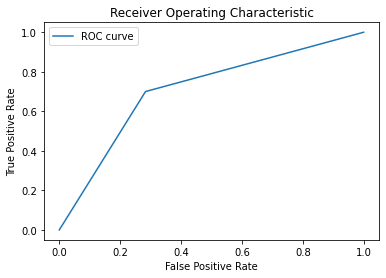

In [ ]:
plot_roc_curve(Y_test, Y_pred)

In [ ]:
Y_pred =clf.predict(X_valid)

In [ ]:
cf_mat = confusion_matrix(Y_valid, Y_pred)
print('Confusion matrix')
print(cf_mat)
print(classification_report(Y_valid, Y_pred))

Confusion matrix
[[60  0]
 [ 0 60]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        60

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [ ]:
roc_auc_score(Y_valid, Y_pred)

1.0